PROJECT OBJECTIVE: Create a movie recommendation system using logistic regression, incorporating user demographics and movie ratings from a detailed dataset. Explore the interplay between user characteristics, movie features, and ratings to build a predictive model. The goal is to deliver precise and personalized movie recommendations, enriching the user experience.

Importing the dependencies

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
df_movies=pd.read_csv(r"C://Users//Lenovo//MyPython//movies.dat",sep='::',engine='python',encoding='latin1')
df_movies.columns=['MovieID','Title','Genres']
df_movies.dropna(inplace=True)
df_movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [20]:
df_movies.shape

(3882, 3)

In [21]:
df_movies.describe()

,MovieID
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [22]:
df_movies.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [23]:
df_ratings=pd.read_csv(r"C://Users//Lenovo//MyPython//ratings.dat",sep='::',engine='python',encoding='latin1')
df_ratings.columns =['ID','MovieID','Ratings','TimeStamp']
df_ratings.dropna(inplace=True)
df_ratings.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [24]:
df_ratings.head(20)

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
5,1,1287,5,978302039
6,1,2804,5,978300719
7,1,594,4,978302268
8,1,919,4,978301368
9,1,595,5,978824268


In [25]:
df_ratings.shape

(1000208, 4)

In [26]:
df_ratings.describe()

,ID,MovieID,Ratings,TimeStamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [27]:
df_ratings.isnull().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [29]:
df_users=pd.read_csv(r"C://Users//Lenovo//MyPython//users.dat",sep='::',engine='python',encoding='latin1')
df_users.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_users.dropna(inplace=True)
df_users.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [30]:
df_users.shape

(6039, 5)

In [31]:
df_users.describe()

,UserID,Age,Occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [32]:
df_users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_users['Gender']=labelencoder.fit_transform(df_users['Gender'])
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [34]:
df_users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [35]:
df = pd.concat([df_movies, df_ratings,df_users], axis=1)
df.dropna()
df.head()

,MovieID,Title,Genres,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117


In [36]:
df.shape

(1000208, 12)

REMOVING UNNECESSARY COLUMNS

In [37]:
df2=df.drop(['Occupation','Zip-code','TimeStamp'],axis=1)
df2.head()

,MovieID,Title,Genres,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [38]:
df2.describe()

,MovieID,ID,MovieID,Ratings,UserID,Gender,Age
count,3882.000000,1.000208e+06,1.000208e+06,1.000208e+06,6039.000000,6039.000000,6039.000000
mean,1986.560793,3.024515e+03,1.865541e+03,3.581563e+00,3021.000000,0.717172,30.644146
std,1146.483260,1.728411e+03,1.096041e+03,1.117102e+00,1743.453469,0.450411,12.891387
min,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,2.000000,0.000000,1.000000
25%,983.250000,1.506000e+03,1.030000e+03,3.000000e+00,1511.500000,0.000000,25.000000
50%,2010.500000,3.070000e+03,1.835000e+03,4.000000e+00,3021.000000,1.000000,25.000000
75%,2980.750000,4.476000e+03,2.770000e+03,4.000000e+00,4530.500000,1.000000,35.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,6040.000000,1.000000,56.000000


In [39]:
df2.isnull().sum()

MovieID    996326
Title      996326
Genres     996326
ID              0
MovieID         0
Ratings         0
UserID     994169
Gender     994169
Age        994169
dtype: int64

In [40]:
df_final=df2.dropna()

# Data  Visualisation

<Axes: xlabel='Gender', ylabel='count'>

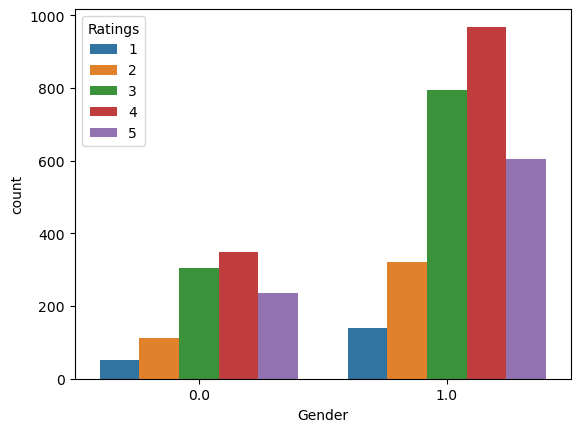

In [41]:
sns.countplot(x=df_final['Gender'],hue=df_final['Ratings'])

Text(0.5, 0, 'Ratings')

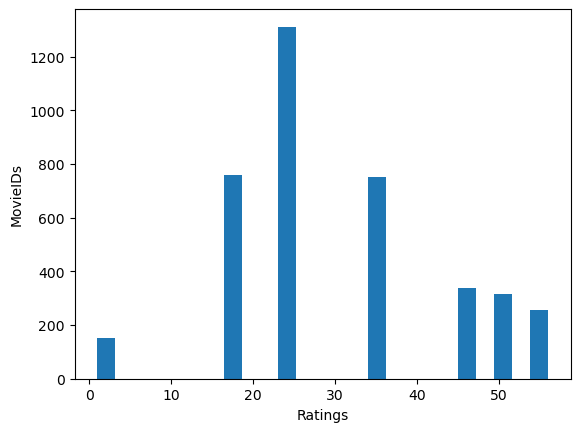

In [42]:
df_final.Age.plot.hist(bins=25)
plt.ylabel('MovieIDs')
plt.xlabel('Ratings')

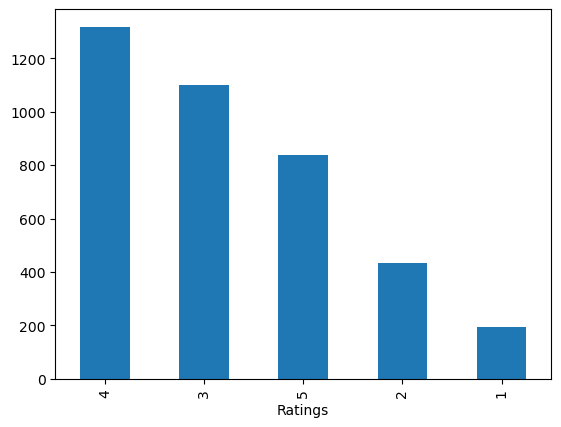

In [43]:
df_final['Ratings'].value_counts().plot(kind='bar')
plt.show()

<Axes: ylabel='Frequency'>

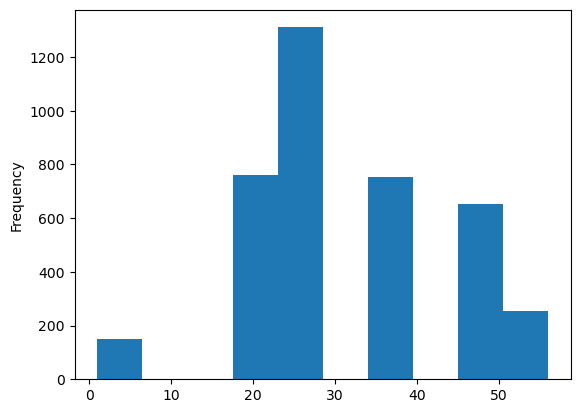

In [44]:
df_final['Age'].plot.hist(bins=10)

<Axes: xlabel='Age', ylabel='count'>

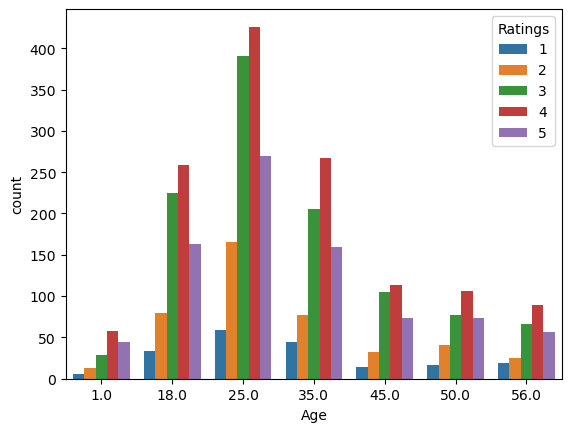

In [46]:
sns.countplot(x=df_final['Age'],hue=df_final['Ratings'])

In [47]:
df_final.head()

,MovieID,Title,Genres,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,6.0,0.0,50.0


In [48]:
i_nput=df_final.drop(['Ratings','Title','Genres','MovieID'],axis=1)
target=df_final['Ratings']

In [49]:
target.head()

0    3
1    3
2    4
3    5
4    3
Name: Ratings, dtype: int64

In [50]:
i_nput.head()

,ID,UserID,Gender,Age
0,1,2.0,1.0,56.0
1,1,3.0,1.0,25.0
2,1,4.0,1.0,45.0
3,1,5.0,1.0,25.0
4,1,6.0,0.0,50.0


# Training the model using Logistic regression

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(i_nput)
scaled_df=pd.DataFrame(scaled_data,columns=i_nput.columns)
scaled_df.head()

,ID,UserID,Gender,Age
0,0.0,0.000000,1.0,1.000000
1,0.0,0.000258,1.0,0.436364
2,0.0,0.000515,1.0,0.800000
3,0.0,0.000773,1.0,0.436364
4,0.0,0.001031,0.0,0.890909


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(i_nput,target,test_size=0.3)

In [53]:
print(Y_train)

817     5
699     4
2257    4
212     5
835     4
       ..
3061    3
2592    2
2815    4
3659    3
750     3
Name: Ratings, Length: 2717, dtype: int64


In [54]:
print(Y_test)

246     4
1245    4
793     4
2989    4
896     4
       ..
1325    2
3583    3
2848    3
3320    5
1814    3
Name: Ratings, Length: 1165, dtype: int64


In [55]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [56]:
X_test=np.array(X_test)

In [57]:
model.predict(X_test)

array([4, 4, 4, ..., 4, 3, 4], dtype=int64)

In [58]:
print(Y_test)

246     4
1245    4
793     4
2989    4
896     4
       ..
1325    2
3583    3
2848    3
3320    5
1814    3
Name: Ratings, Length: 1165, dtype: int64


In [59]:
from sklearn.metrics import accuracy_score
# Convert X_test to numpy array if it's not already
X_test = np.array(X_test)

# Predict using the trained model
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.3339055793991416


CONCLUSION: The logistic regression model accurately predicts movie ratings using user demographics. After essential preprocessing and insightful exploratory analysis, the model, while reasonably accurate, provides a foundation for refining the recommendation system for more personalized movie suggestions.